In [1]:
import torch

In [46]:
import scipy.io as sio
from scipy.interpolate import interp1d
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import matplotlib.cm as cm


# Retrieve pickle and csv data

In [124]:
## pickle ##
import pickle

file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
filtered_data_to_tensor = pickle.load(file)
amplitude_filtereddata_to_tensor  = pickle.load(file)
peak2peak_data_to_tensor = pickle.load(file)

file.close()



In [4]:
# to retrieve ##
mt_electrodes = pd.read_csv('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_electrodes.csv')
mt_muscles= pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_muscles.csv")
unique_amplitudes=pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/unique_amplitudes.csv")

# Saving the Recruitment plots

In [268]:
save_flag=1
# subject_plots_folder_name=subject+'_plots'
data_folder = "/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data"
save_folder = os.path.join(data_folder,"Recruitment_curve")
os.makedirs(save_folder,exist_ok=True)

# Recruitment curve

## All elecs for all amps

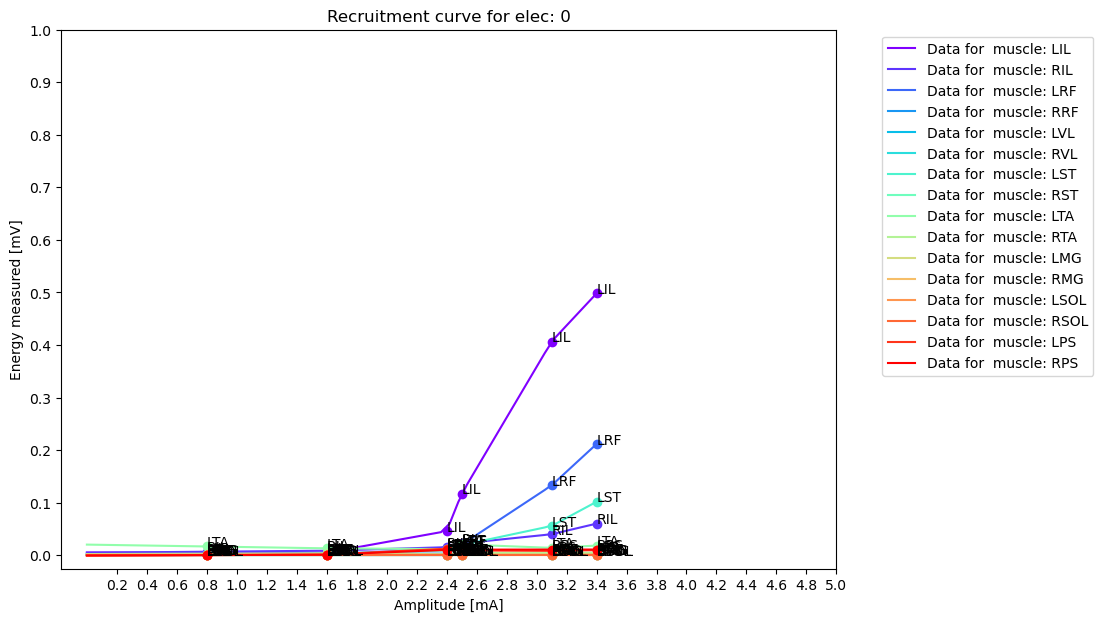

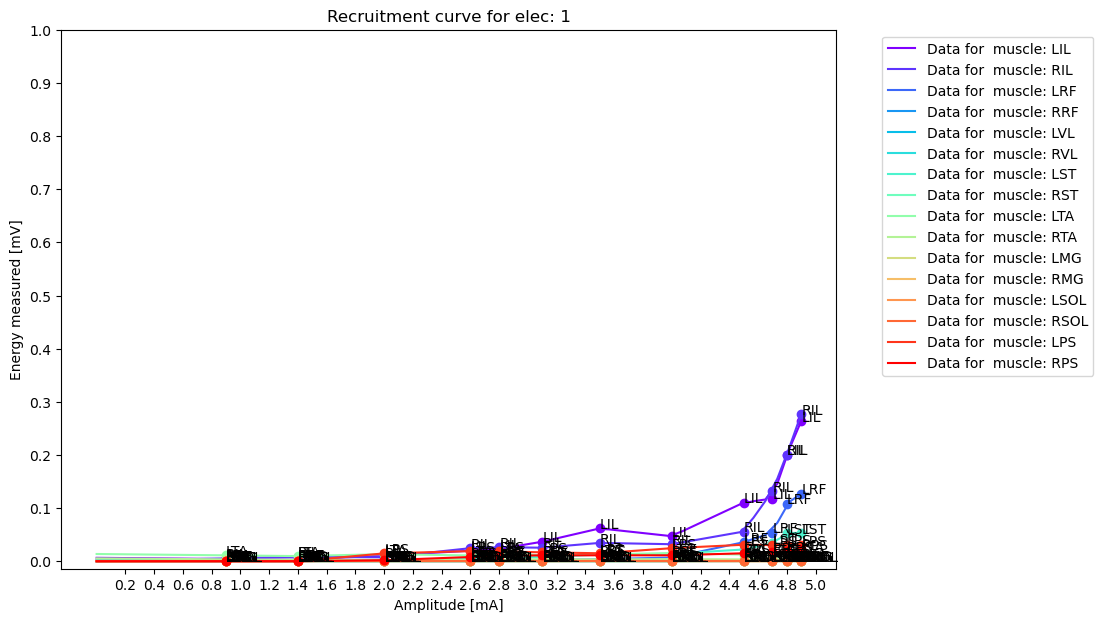

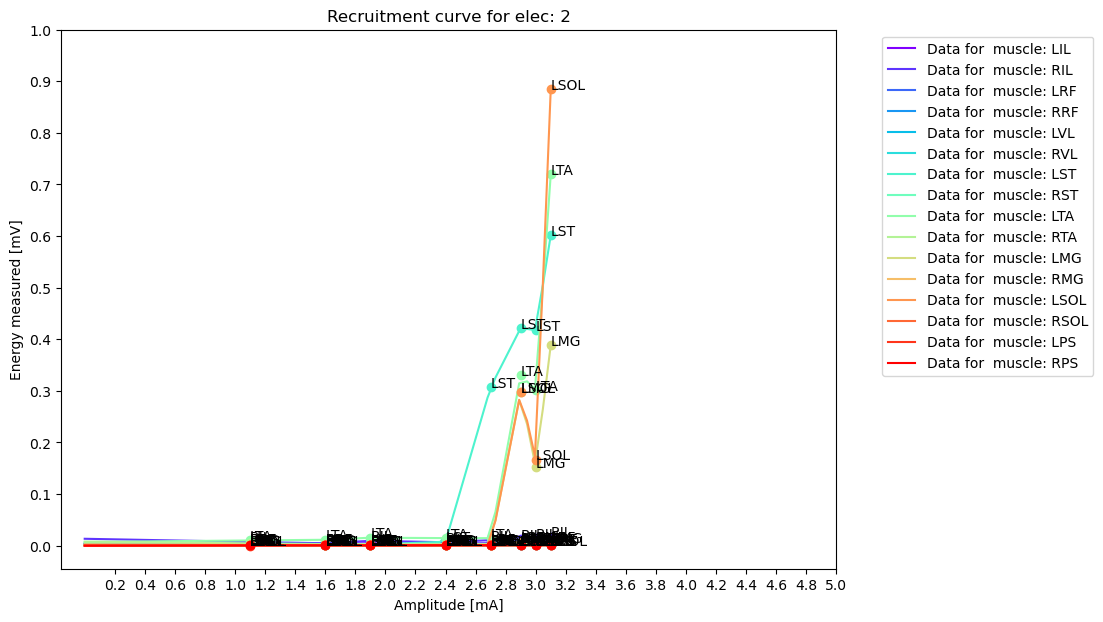

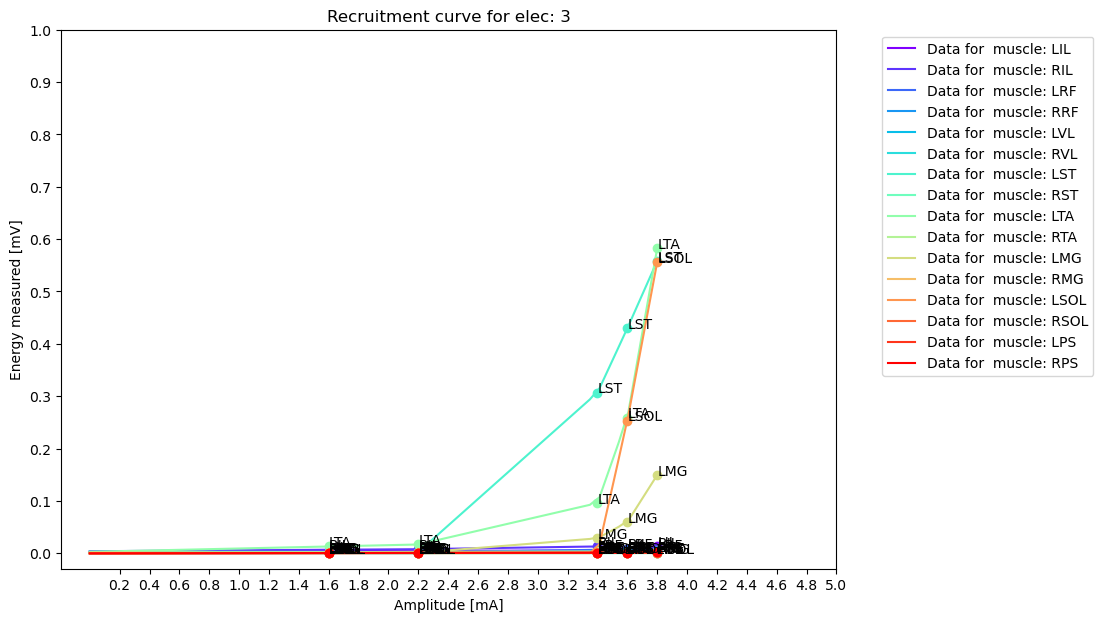

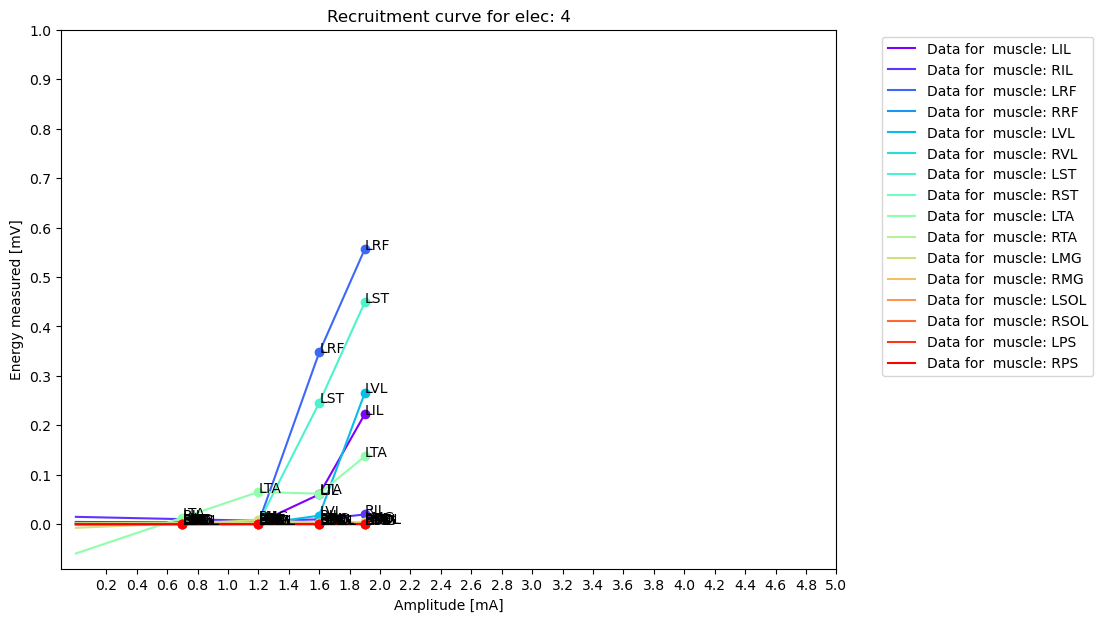

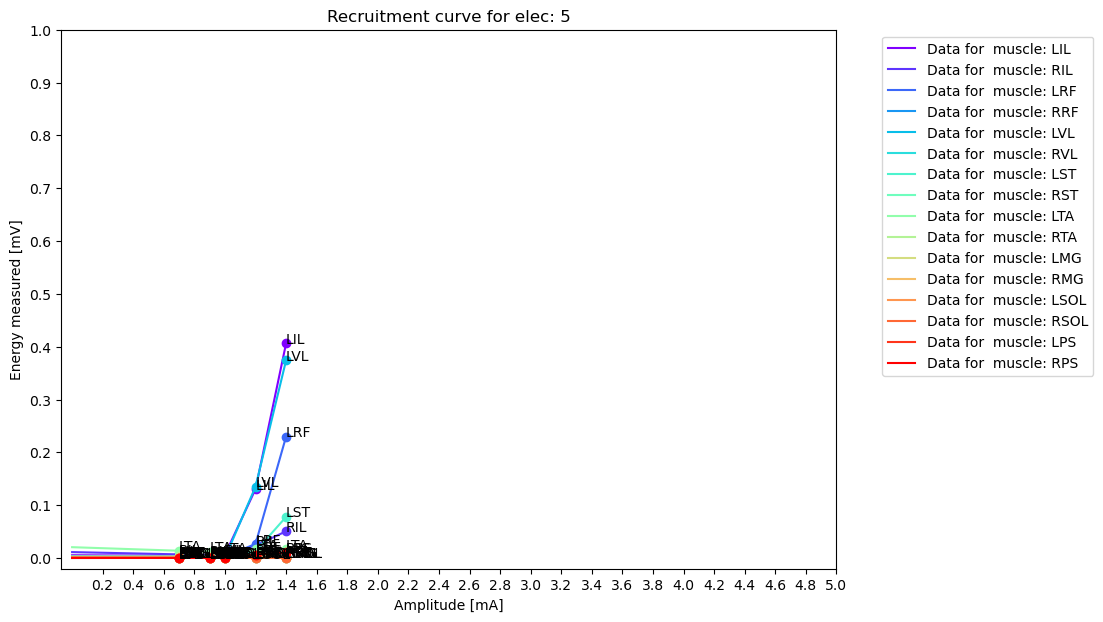

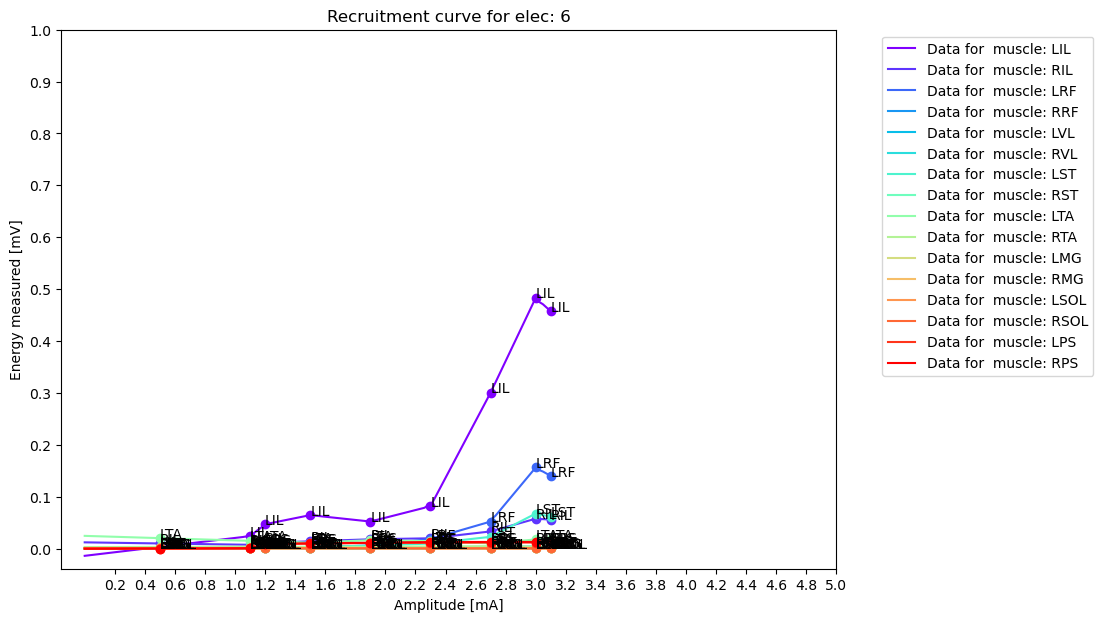

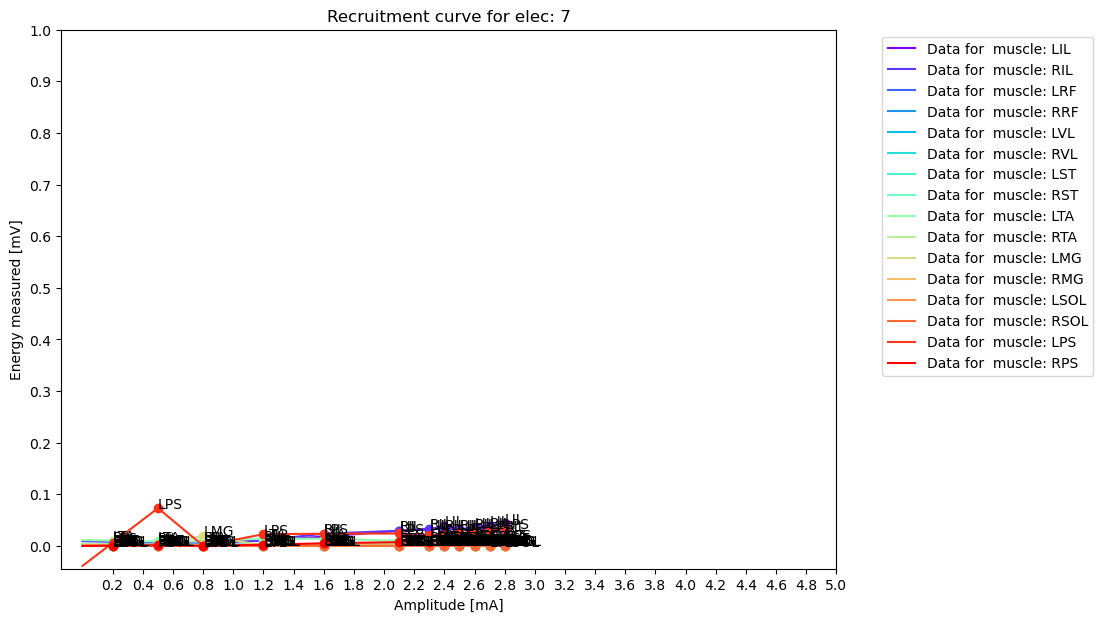

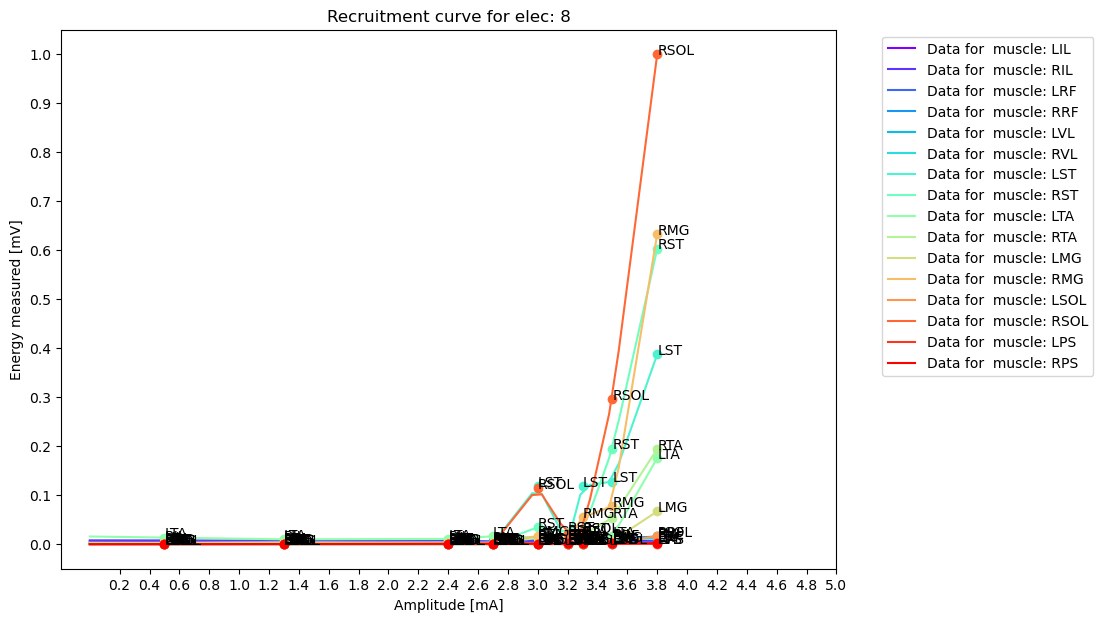

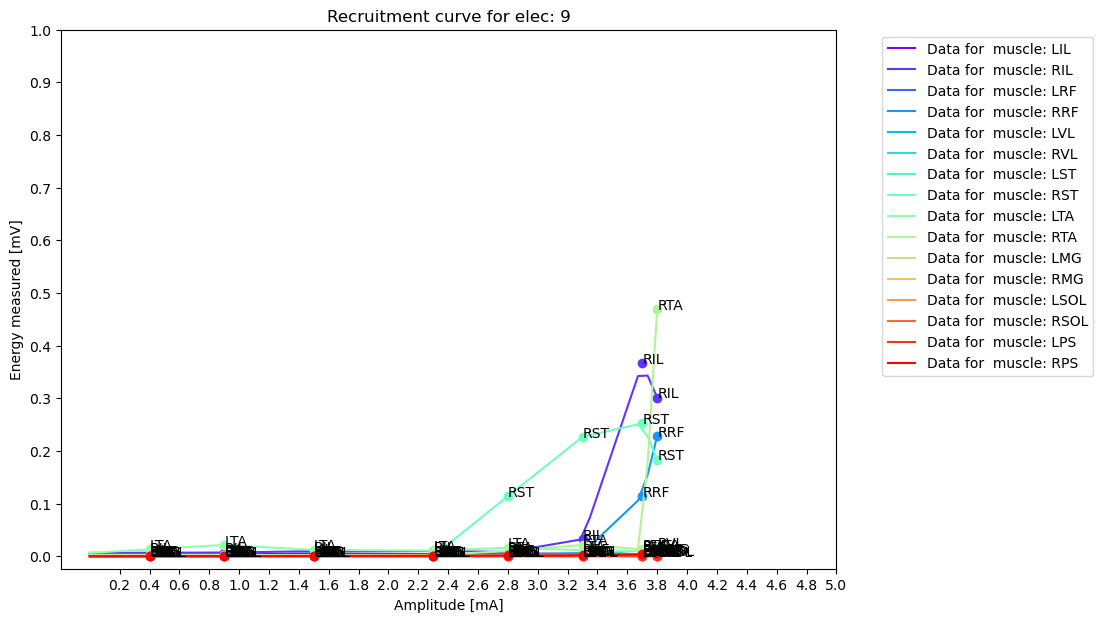

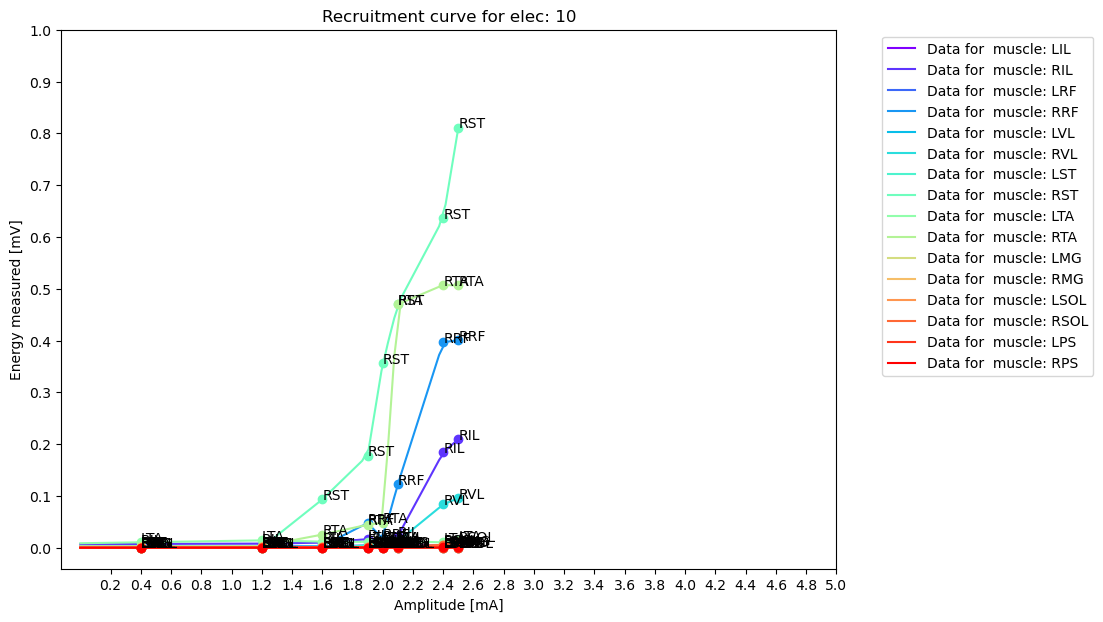

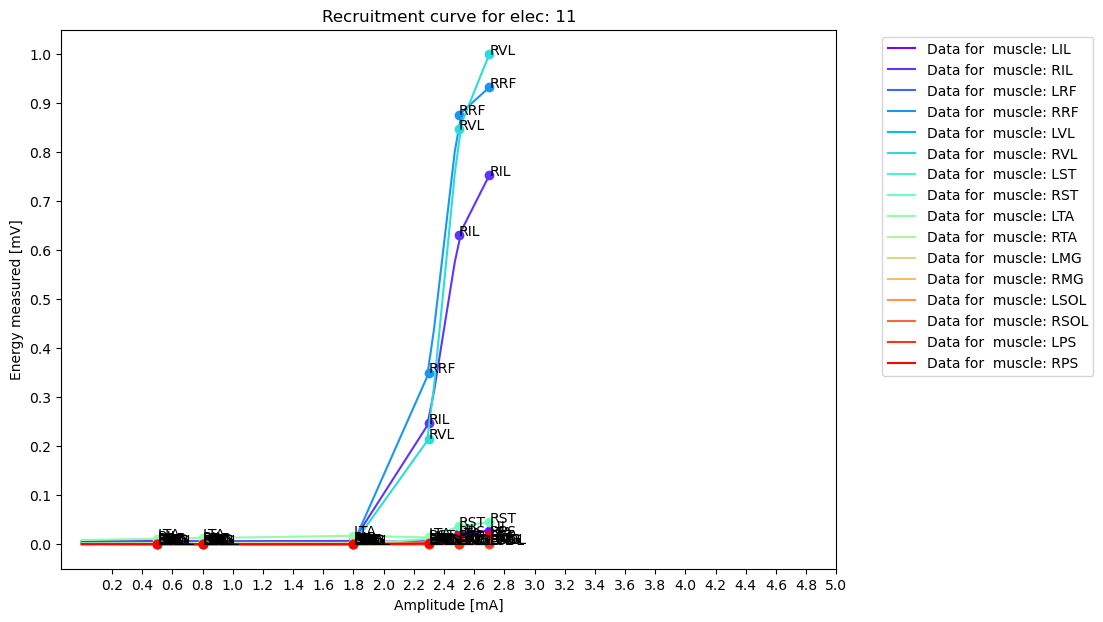

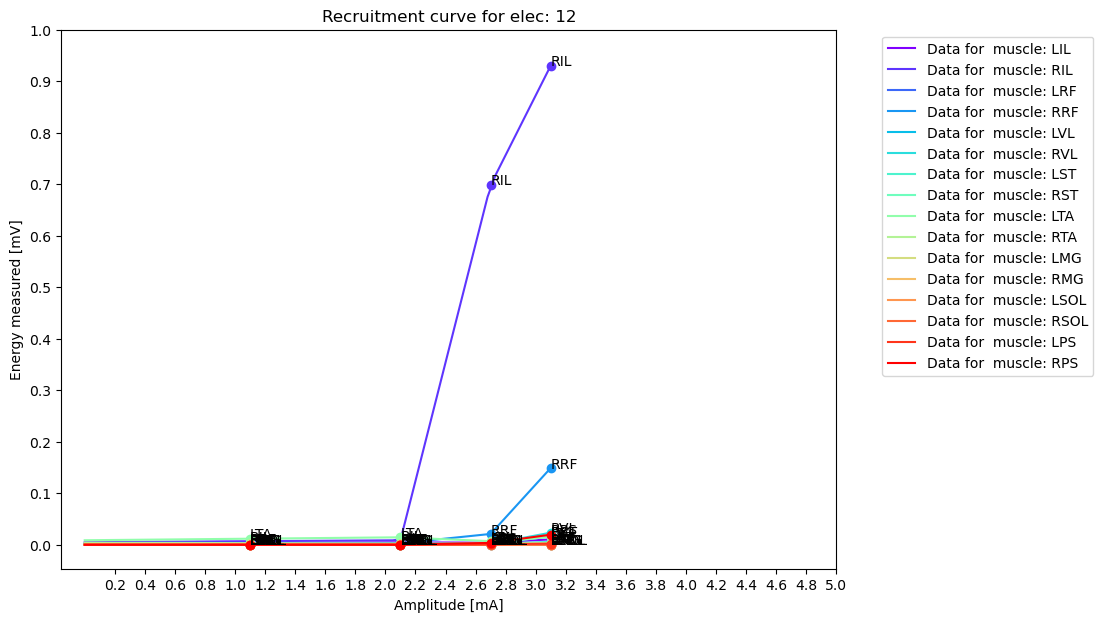

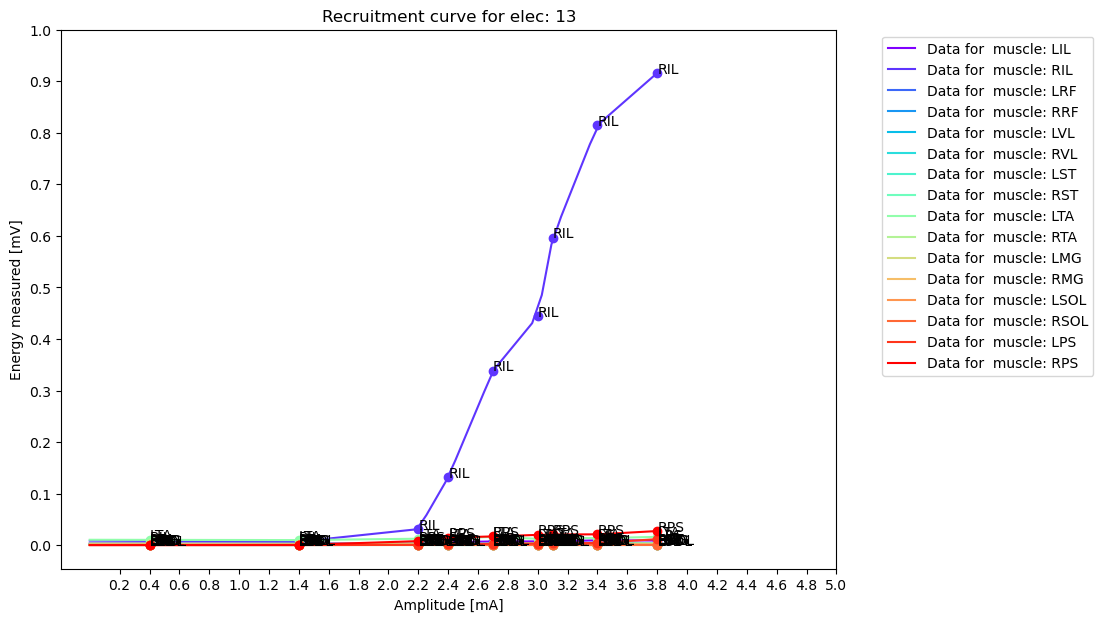

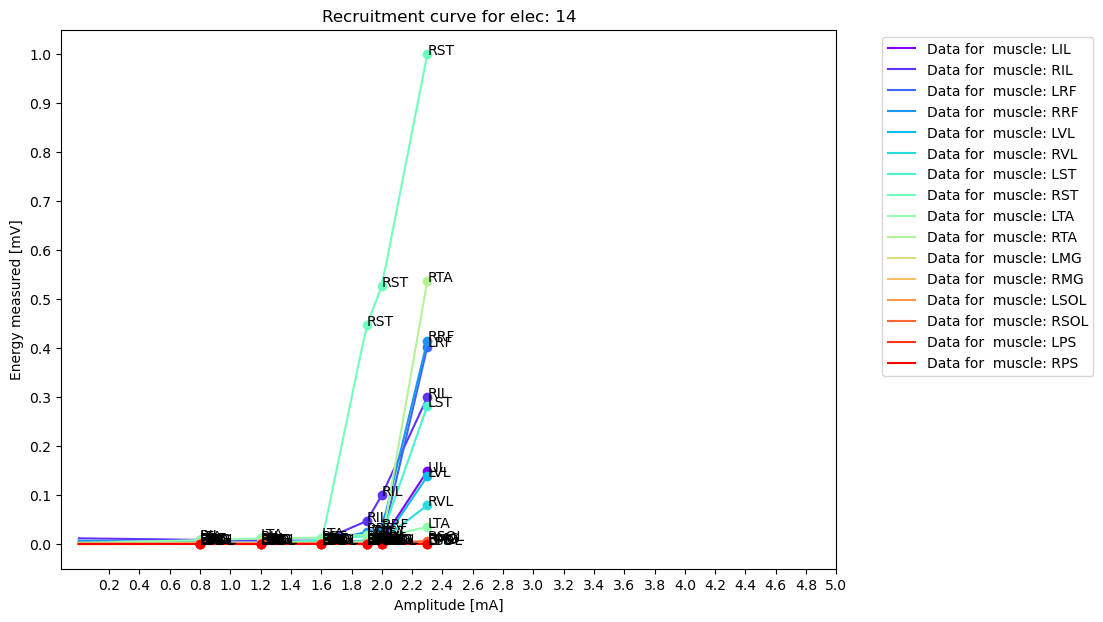

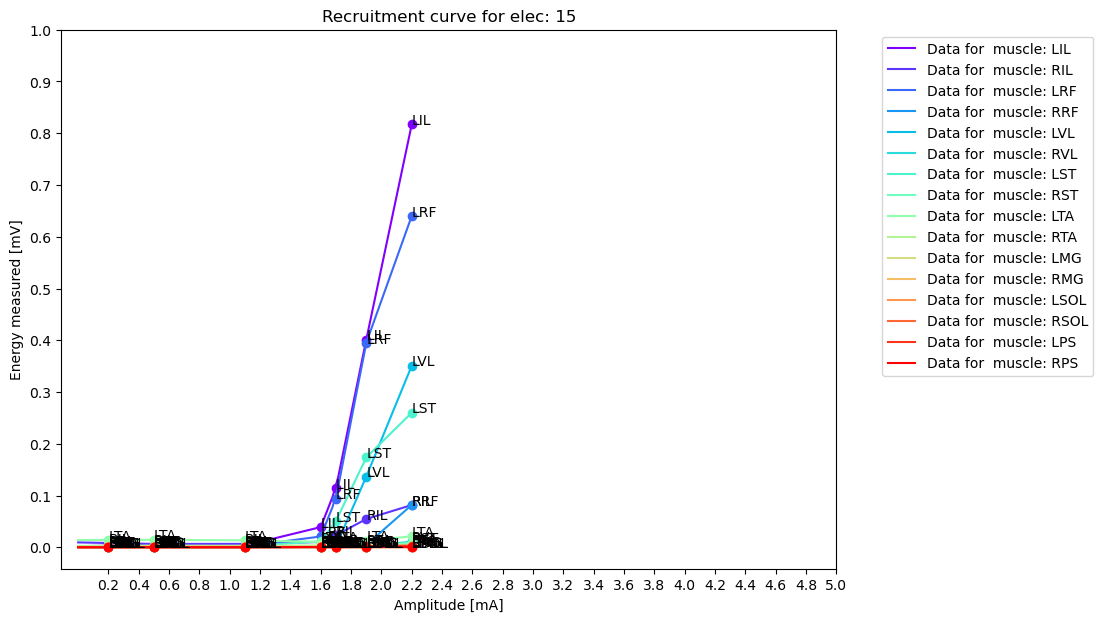

In [294]:
# Final version

colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
label=mt_muscles["muscle_name"]

for elec_i in range (0, len(mt_electrodes)):
  fig, ax = plt.subplots(figsize=(10,7))
  for muscle_i in range (len(mt_muscles)):

    # Define variables for plotting
    x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
    y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
    f = interp1d(x, y, axis=0,  fill_value="extrapolate")
    f2 = interp1d(x, y, kind='cubic',axis=0,  fill_value="extrapolate")
    xnew = np.linspace(0, np.nanmax(amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]), num=60, endpoint=True)
    
    # Remove nan values for the text index
    x_without_nan=np.array(x)
    x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
    y_without_nan=np.array(y)
    y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

    # Plot the data points
    plt.plot(x, y, 'o', c=colors[muscle_i]) 
    
    # Add text descripiton to the points for visibility
    for index in range (len(x_without_nan)):
        ax.text(x_without_nan[index], y_without_nan[index], label[muscle_i], size=10) 
    
    # Plot the interpolation of data points to see trend
    plt.plot(xnew, f(xnew), '-', c=colors[muscle_i], label= f"Data for  muscle: {mt_muscles['muscle_name'][muscle_i]}")
    
    # Set label and scale
    ax.set_xlabel("Amplitude [mA]")
    # ax.set_xticks(ticks=list(unique_amplitudes["amplitudes"]))
    ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

 # Plotting settings
  ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.set_title(f"Recruitment curve for elec: {elec_i}")

  # save plots
  if save_flag:
      data_file = "elec"+"_"+str(elec_i)+"_"+"recruitment_curve"+'.png'
      data_file_path = os.path.join(save_folder,data_file)
      plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
  plt.show()


# Calculate Integral

Don't do this for now, evt. later to check results
We use time series for now (not peak to peak values)

In [17]:

# y are tiem_points of one time series , take abs value
y=abs(filtered_data_to_tensor[7, 0, 4 ,0, :])
x= np.arange(0, len(y))
scipy.integrate.simps(y, x, dx=1, axis=- 1, even='avg')


605.7151865034102